# Supplement Figure 1
Shows the VAF plots of each of the subquestions

In [1]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import seaborn as sns
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
import matplotlib as mpl

import json, pickle
from tqdm import tqdm
import sys, os, pdb

from src.data_utils import ECoG_Data
import src.manifold_u as mu
import importlib
importlib.reload(mu)
import fig_utils as figu
importlib.reload(figu)

plt.style.use(['science', 'retro'])
sns.set_style("ticks")
plt.rcParams.update({"font.size": 10})

In [2]:
movement_colors, day_colors, participant_colors, exp_class_colors, exp_participant_colors, freq_colors = mu.get_all_colors()

### Gather Naturalistic Data

In [3]:
filepath = '/home/zsteineh/research_projects/NaturalisticNeuralManifolds/experiment_params/'
file_name = 'exp_params_nat_pca.json'
try:
    json_filename = filepath + file_name
except IndexError:
    raise SystemExit(f"Usage: {sys.argv[0]} <json file of experiment parameters>")
with open(json_filename) as f:
    Q3_exp_params = json.load(f)
print(Q3_exp_params['comment'])

Param file for running PCA pipeline on naturalistic data


In [4]:
freq_bands = Q3_exp_params["freq_bands"]
class_dict = Q3_exp_params["class_dict"]
class_dict = {int(cur_key): val for cur_key, val in class_dict.items()}
class_color = Q3_exp_params["class_color"]
class_color = {int(cur_key): val for cur_key, val in class_color.items()}

proj_mat_sp = Q3_exp_params["sp"] + Q3_exp_params["dataset"] + Q3_exp_params["experiment_folder"]

percent_threshold = 0.8
pats_ids_in = Q3_exp_params["pats_ids_in"]
days_tested = Q3_exp_params["test_day"]

cur_freq = 'Beta'
cur_freq_ind = 2
freq_red_dim = 10

In [5]:
Q3_all_sbjs_pca = []
for f, freq in enumerate(freq_bands):
    cur_pca = np.load(proj_mat_sp + freq + '_pca_objects.npy', allow_pickle=True)
    Q3_all_sbjs_pca.append(cur_pca)
Q3_all_sbjs_pca = np.array(Q3_all_sbjs_pca)
print(Q3_all_sbjs_pca.shape)

(6, 12, 5, 5)


In [6]:
# get Q1 VAF - variance per movement
pca_manifolds_VAF = mu.extract_explained_var(
    class_dict, freq_bands, pats_ids_in, Q3_all_sbjs_pca
)
print(pca_manifolds_VAF.shape)
# pca_manifolds_VAF shape of (num_freqs, num_sbjs, num_days, num_mvmts, num_components)
# extract just LFO
cf_pca_manifolds_VAF = pca_manifolds_VAF[cur_freq_ind,...]
# remove rest data
cf_pca_manifolds_VAF = cf_pca_manifolds_VAF[:, :, 1:, :]
print(cf_pca_manifolds_VAF.shape)

# get average across mvmts and std
Q1_avg_mvmt_subj_components = np.nanmean(cf_pca_manifolds_VAF, axis=(0, 1))
Q1_std_mvmt_subj_components = np.nanstd(cf_pca_manifolds_VAF, axis=(0, 1))

# get Q3 VAF - variance per day
Q3_avg_mvmt_subj_components = np.nanmean(cf_pca_manifolds_VAF, axis=(0, 2))
Q3_std_mvmt_subj_components = np.nanstd(cf_pca_manifolds_VAF, axis=(0, 2))

# get Q4 VAF - variance per subject
Q4_avg_mvmt_subj_components = np.nanmean(cf_pca_manifolds_VAF, axis=(1, 2))
Q4_std_mvmt_subj_components = np.nanstd(cf_pca_manifolds_VAF, axis=(1, 2))

(6, 12, 5, 5, 311)
(12, 5, 4, 311)


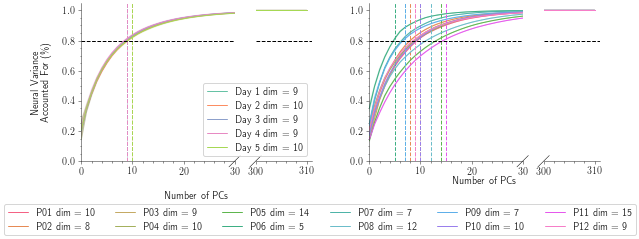

In [7]:
# make a 2 x 2 grid of subplots
fig, axes = plt.subplots(figsize=(7.5, 2.5))
plt.rcParams.update({"font.size": 10})
plt.axis('off')
sns.despine()
plt.tight_layout()

# sps1, sps2, sps3, sps4 = GridSpec(2,2, figure=fig)
axes = GridSpec(1,2, figure=fig)
axes.update(wspace=0.25, hspace=0.3)
# axes.tight_layout(fig)

days_to_plot = ["Day " + str(int(i) - 2) for i in days_tested]
# days_fig_path = '/home/zsteineh/research_projects/neural_manifolds/data/my_day_clipart.jpeg'
figu.subplot_VAF(Q3_avg_mvmt_subj_components, 
            Q3_std_mvmt_subj_components,
            days_to_plot, 
            "Naturalistic Days", 
            day_colors, 
            axes[0,0],
            )

# participant_fig_path = '/home/zsteineh/research_projects/neural_manifolds/data/my_participant_clipart.jpeg'
figu.subplot_VAF(Q4_avg_mvmt_subj_components, 
            Q4_std_mvmt_subj_components,
            pats_ids_in, 
            "Naturalistic Participants", 
            participant_colors, 
            axes[0,1],
            # var_of_interest_icon=participant_fig_path,
            y_label=False)

# save as an svg
plt.savefig("/home/zsteineh/research_projects/NaturalisticNeuralManifolds/figures/saved_figures/supplement_nat_VAF.svg", format="svg")
plt.show()

### Gather experimental data

In [8]:
filepath = '/home/zsteineh/research_projects/NaturalisticNeuralManifolds/experiment_params/'
file_name = 'exp_params_exp_pca.json'
try:
    json_filename = filepath + file_name
except IndexError:
    raise SystemExit(f"Usage: {sys.argv[0]} <json file of experiment parameters>")
with open(json_filename) as f:
    Q5_exp_params = json.load(f)
print(Q5_exp_params['comment'])

Param file for running PCA pipeline on experimental data


In [9]:
exp_pats_ids_in = Q5_exp_params["pats_ids_in"]
exp_days_tested = ""
exp_class_dict = Q5_exp_params["class_dict"]
Q5_proj_mat_sp = Q5_exp_params["sp"] + Q5_exp_params["dataset"] + Q5_exp_params["experiment_folder"]

In [10]:
Q5_all_sbjs_pca = []
for f, freq in enumerate(freq_bands):
    cur_pca = np.load(Q5_proj_mat_sp + freq + '_pca_objects.npy', allow_pickle=True)
    Q5_all_sbjs_pca.append(cur_pca)
Q5_all_sbjs_pca = np.array(Q5_all_sbjs_pca)
print(Q5_all_sbjs_pca.shape)

(6, 5, 1, 5)


In [11]:
# get Q5 VAF - variance per movement
exp_pca_manifolds_VAF = mu.extract_explained_var(
    class_dict, freq_bands, exp_pats_ids_in, Q5_all_sbjs_pca
)
# pca_manifolds_VAF shape of (num_freqs, num_sbjs, num_days, num_mvmts, num_components)
# extract just LFO
exp_cf_pca_manifolds_VAF = exp_pca_manifolds_VAF[cur_freq_ind,...]
exp_cf_pca_manifolds_VAF = np.squeeze(exp_cf_pca_manifolds_VAF)
print(exp_cf_pca_manifolds_VAF.shape)

# get average across mvmts and std
Q5_avg_mvmt_components = np.nanmean(exp_cf_pca_manifolds_VAF, axis=0)
Q5_std_mvmt_components = np.nanstd(exp_cf_pca_manifolds_VAF, axis=0)

Q5_avg_subj_components = np.nanmean(exp_cf_pca_manifolds_VAF, axis=1)
Q5_std_subj_components = np.nanstd(exp_cf_pca_manifolds_VAF, axis=1)

(5, 5, 311)


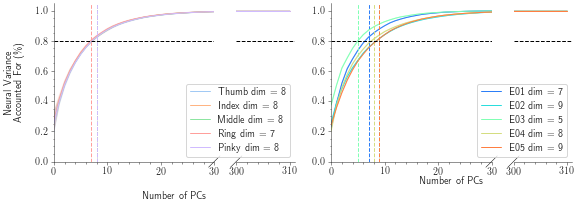

In [12]:
fig, axes = plt.subplots(figsize=(7.5, 2.5))
plt.axis('off')
sns.despine()
plt.tight_layout()

# sps1, sps2, sps3, sps4 = GridSpec(2,2, figure=fig)
axes = GridSpec(1,2, figure=fig)
axes.update(wspace=0.15, hspace=0.3)

# just a temp icon for npw
figu.subplot_VAF(Q5_avg_mvmt_components,
            Q5_std_mvmt_components,
            exp_class_dict.values(),
            "Experimental Movements",
            exp_class_colors,
            axes[0,0],
            # var_of_interest_icon=mvmt_fig_path,
            x_label=True,)

figu.subplot_VAF(Q5_avg_subj_components,
            Q5_std_subj_components,
            exp_pats_ids_in,
            "Experimental Participants",
            exp_participant_colors,
            axes[0,1],
            # var_of_interest_icon=participant_fig_path,
            x_label=True,
            y_label=False,)

plt.savefig("/home/zsteineh/research_projects/NaturalisticNeuralManifolds/figures/saved_figures/supplement_exp_VAF.svg", format="svg")
plt.show()